/opt/homebrew/Caskroom/miniconda/base/envs/yolo/lib/python3.12/site-packages/PIL/Image.py:3218: DecompressionBombWarning: Image size (134217728 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


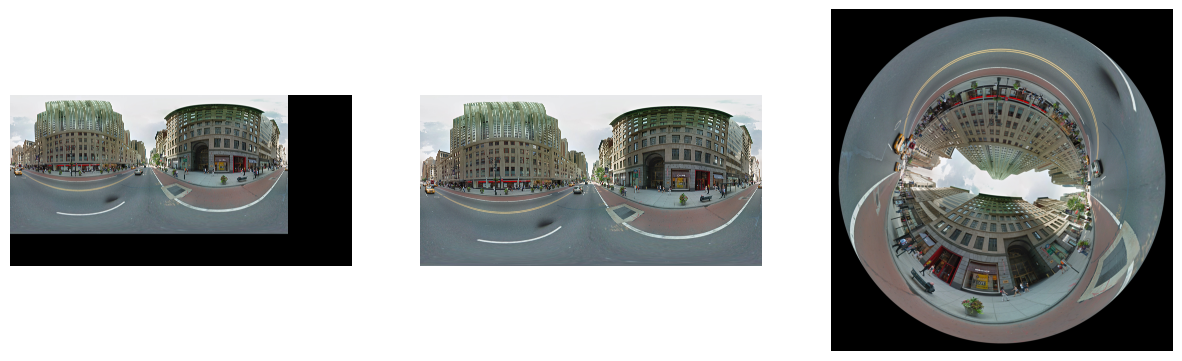

In [1]:
import os
from streetview import search_panoramas,get_panorama
import cv2
from omnicv import fisheyeImgConv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def getPanoID(lat, lon):
    try:
        panos = search_panoramas(lat=lat, lon=lon)
        pano_id = panos[0].pano_id
        return pano_id  
    except:
        return None

def getPanorama(pano_id):
    try:
        pano = get_panorama(pano_id=pano_id)
        pano_path = os.path.join(os.getcwd(), 'img', 'pano_'+pano_id+'.jpg')
        pano.save(pano_path, "jpeg")

        return pano_path
    except:
        return None

def cropPanorama(pano_path,pano_id):
    try:
        image = cv2.imread(pano_path)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        _, binary = cv2.threshold(gray, 1, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        x, y, w, h = cv2.boundingRect(contours[0])
        crop_image = image[y:y+h, x:x+w]
        crop_path = os.path.join(os.getcwd(), 'img', 'crop_'+pano_id+'.jpg')
        cv2.imwrite(crop_path, crop_image)
        return crop_path
    except:
        return None

def changeToFisheye(pano_path, pano_id):
    try:
        equiRect = cv2.imread(pano_path)
        outShape = [5048,5048]
        mapper = fisheyeImgConv()
        fisheye = mapper.equirect2Fisheye(equiRect,outShape=outShape,f=1600,angles=[100,50,0])
        fe_path = os.path.join(os.getcwd(), 'img', 'fe_'+pano_id+'.jpg')
        cv2.imwrite(fe_path, fisheye)
        return fe_path
    except:
        return None

def showImage(pano_path, crop_path, feye_path):
    try:
        plt.figure(figsize=(15,5))  

        plt.subplot(1, 3, 1) 
        img = mpimg.imread(pano_path)
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(1, 3, 2)  
        img = mpimg.imread(crop_path)
        plt.imshow(img)
        plt.axis('off')

        plt.subplot(1, 3, 3) 
        img = mpimg.imread(feye_path)
        plt.imshow(img)
        plt.axis('off')

        plt.show()
    except:
        print('Failed to show image')

if __name__ == '__main__':
    lat = 40.748817
    lon = -73.985428
    pano_id = getPanoID(lat, lon)
    pano_path = getPanorama(pano_id) if pano_id else print('Failed to get pano_id')
    crop_path = cropPanorama(pano_path, pano_id) if pano_path else print('Failed to download panorama')
    feye_path = changeToFisheye(crop_path, pano_id) if crop_path else print('Failed to crop image')
    showImage(pano_path, crop_path, feye_path)

